# Project - Logistic Regression
# Submitter - Kingshuk Banerjee

### Attribute Information:
####  ID: Customer ID
####  Age: Customer's age in completed years
####  Experience: #years of professional experience
####  Income: Annual income of the customer ($000)
####  ZIP Code: Home Address ZIP code.
####  Family: Family size of the customer
####  CCAvg: Avg. spending on credit cards per month ($000)
####  Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
####  Mortgage: Value of house mortgage if any. ($000)
####  Personal Loan: Did this customer accept the personal loan offered in the last campaign?
####  Securities Account: Does the customer have a securities account with the bank?
####  CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
####  Online: Does the customer use internet banking facilities?
####  Credit card: Does the customer use a credit card issued by the bank?

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Import the data file

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.drop('ID', axis=1, inplace=True)
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


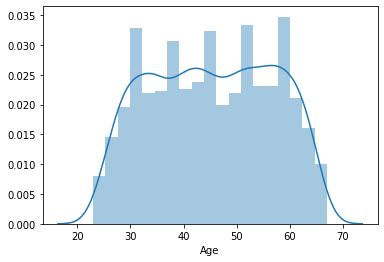

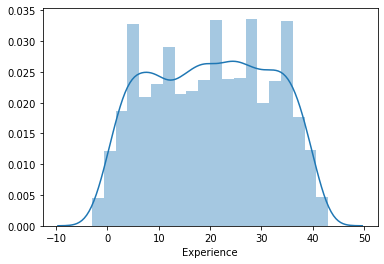

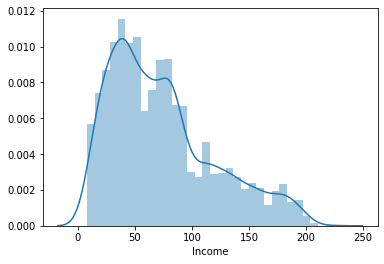

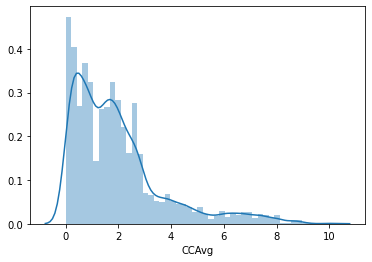

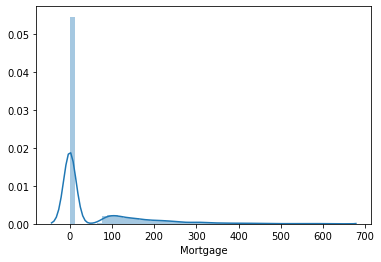

In [8]:
distvars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for d in distvars:
    sns.distplot(df[d], label=d)
    plt.show()

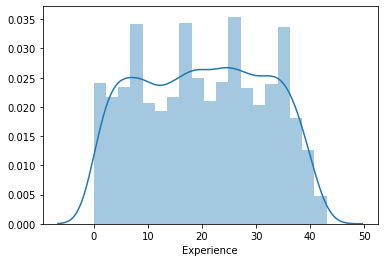

In [9]:
# Treat negative numbers in Experience
df['Experience'].value_counts()
# Only 52 values have -1, -2 and -3, change this to absolute
df['Experience'] = df['Experience'].apply(lambda x: np.abs(x))
sns.distplot(df['Experience'])

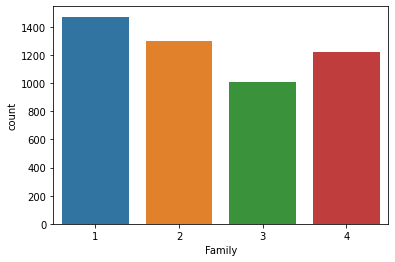

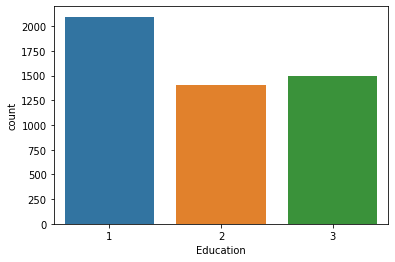

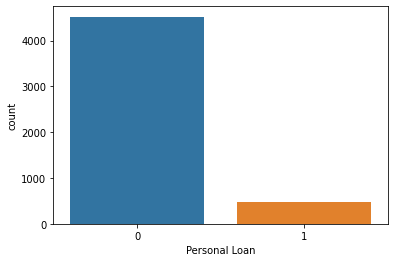

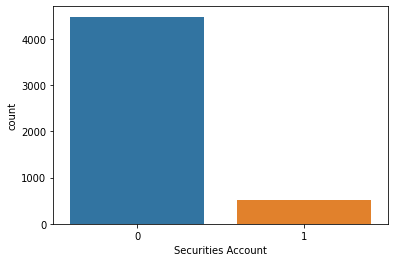

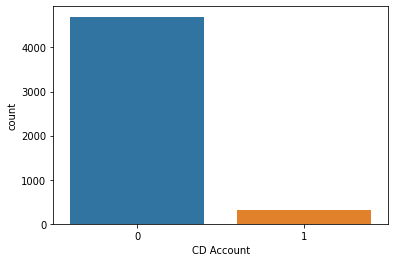

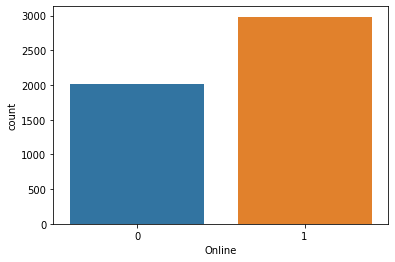

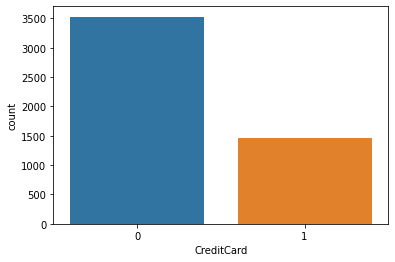

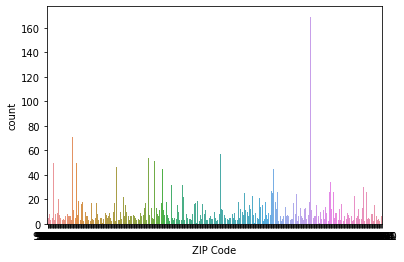

In [10]:
countvars = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'ZIP Code']
for v in countvars:
    sns.countplot(df[v])
    plt.show()


In [11]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [12]:
for d in ['Securities Account', 'CD Account', 'Online', 'CreditCard']:
    vc = df[d].value_counts(normalize=True)
    print(vc)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64


### No. of people with zero Mortage and zero Credit Card spending

In [13]:
df[df['Mortgage'] == 0].shape

(3462, 13)

In [14]:
df[df['CreditCard'] == 0].shape

(3530, 13)

### How many debt free persons applied for personal loan

In [15]:
df[(df['Mortgage'] == 0) & (df['CreditCard'] == 0) & (df['Personal Loan'] == 1)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
18,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
38,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
57,56,31,131,95616,2,1.2,3,0,1,0,0,0,0
78,54,30,133,93305,2,2.6,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,51,25,173,95051,1,0.5,2,0,1,0,0,1,0
4811,36,12,123,90502,2,3.0,3,0,1,0,0,0,0
4846,35,10,135,94596,3,4.8,2,0,1,0,0,1,0
4876,44,19,142,95054,1,1.5,3,0,1,0,0,0,0


#### There are 222/480 (46%) of debt free customers took Personal Loan. 

## Bivariate analysis

In [16]:
df.groupby('Personal Loan').mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


#### People with higher Mortgage and higer CCAvg took Personal Loan.  

In [17]:
df.groupby('Personal Loan').median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


### Lets treat the ZIP code

In [18]:
df['ZIP Code'].mode()

0    94720
dtype: int64

In [19]:
pd.crosstab(df['ZIP Code'], df['Personal Loan'])

Personal Loan,0,1
ZIP Code,,
9307,1,0
90005,5,0
90007,6,0
90009,8,0
90011,3,0
...,...,...
96091,4,0
96094,2,0
96145,1,0


### Convert ZIP code to a manageable categorical variable
### Abstract the ZIP code to broader areas assuming the thousandth place denotes cities/states.

In [21]:
df[df['Personal Loan'] == 1]['ZIP Code']
df['ZIP_Code_Area'] = df['ZIP Code'].apply(lambda x: int(x/1000))
df['ZIP_Code_Area'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     416
96      40
9        1
Name: ZIP_Code_Area, dtype: int64

In [22]:
df['ZIP_Code_Area'] = df['ZIP_Code_Area'].astype('category')
df.drop('ZIP Code', axis=1, inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ZIP_Code_Area
0,25,1,49,4,1.6,1,0,0,1,0,0,0,91
1,45,19,34,3,1.5,1,0,0,1,0,0,0,90
2,39,15,11,1,1.0,1,0,0,0,0,0,0,94
3,35,9,100,1,2.7,2,0,0,0,0,0,0,94
4,35,8,45,4,1.0,2,0,0,0,0,0,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,92
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,92
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,93
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,90


In [29]:
pd.crosstab(df['Securities Account'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
Securities Account,,
0,0.8116,0.084
1,0.0924,0.012


In [30]:
pd.crosstab(df['CD Account'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
CD Account,,
0,0.8716,0.068
1,0.0324,0.028


In [31]:
pd.crosstab(df['Online'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
Online,,
0,0.3654,0.0378
1,0.5386,0.0582


In [32]:
pd.crosstab(df['CreditCard'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
CreditCard,,
0,0.6386,0.0674
1,0.2654,0.0286


In [33]:
pd.crosstab(df['Education'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
Education,,
1,0.4006,0.0186
2,0.2442,0.0364
3,0.2592,0.0410


In [34]:
pd.crosstab(df['Family'], df['Personal Loan'], normalize=True)

Personal Loan,0,1
Family,,
1,0.2730,0.0214
2,0.2380,0.0212
3,0.1754,0.0266
4,0.2176,0.0268


In [35]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'ZIP_Code_Area'],
      dtype='object')

### Convert some columns to category variables

In [36]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')
df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
ZIP_Code_Area         category
dtype: object

## X and Y variable for model

In [37]:
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,ZIP_Code_Area
0,25,1,49,4,1.6,1,0,1,0,0,0,91
1,45,19,34,3,1.5,1,0,1,0,0,0,90
2,39,15,11,1,1.0,1,0,0,0,0,0,94
3,35,9,100,1,2.7,2,0,0,0,0,0,94
4,35,8,45,4,1.0,2,0,0,0,0,1,91


In [38]:
Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [39]:
X = pd.get_dummies(X, drop_first=True)

In [40]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,...,CD Account_1,Online_1,CreditCard_1,ZIP_Code_Area_90,ZIP_Code_Area_91,ZIP_Code_Area_92,ZIP_Code_Area_93,ZIP_Code_Area_94,ZIP_Code_Area_95,ZIP_Code_Area_96
0,25,1,49,1.6,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,35,9,100,2.7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,35,8,45,1.0,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [42]:
Y_train[Y_train['Personal Loan'] == 1].count()

Personal Loan    340
dtype: int64

In [43]:
Y_test[Y_test['Personal Loan'] == 1].count()

Personal Loan    140
dtype: int64

In [44]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [45]:
predictions = model.predict(X_test)
p = pd.DataFrame(predictions)
p[0].value_counts()

0    1390
1     110
Name: 0, dtype: int64

In [46]:
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print("Training accuracy: {}".format(train_accuracy))
print("Testing accuracy: {}".format(test_accuracy))

Training accuracy: 0.9585714285714285
Testing accuracy: 0.9626666666666667


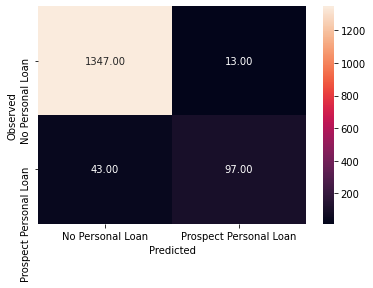

In [47]:
cm = metrics.confusion_matrix(Y_test.values, predictions)
labels = ['No Personal Loan', 'Prospect Personal Loan']
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
print("Training Accuracy: {}".format(model.score(X_train, Y_train)))
print("Test Accuracy: {}".format(model.score(X_test, Y_test)))
print("Accuracy score: {}".format(accuracy_score(Y_test, predictions)))
print("Precision: {}".format(precision_score(Y_test, predictions)))
print("Recall: {}".format(recall_score(Y_test, predictions)))
print("F1 score: {}".format(f1_score(Y_test, predictions)))
print("ROC AUC score: {}".format(roc_auc_score(Y_test, predictions)))

Training Accuracy: 0.9585714285714285
Test Accuracy: 0.9626666666666667
Accuracy score: 0.9626666666666667
Precision: 0.8818181818181818
Recall: 0.6928571428571428
F1 score: 0.7759999999999999
ROC AUC score: 0.8416491596638657


## Precision is good but Recall is not. We need to improve recall so that False Negatives are reduced.
## The bank does not want to miss the prospective Personal Loan customers, while keeping the advertising budget under control.
## Keeping the advertising budget under control means reduced False Positives. 
## Thus Precision is also important but not as much as Recall. 

### 43 customers were missed due to False Negative. 
### 13 customers were targetted unnecessarily. 

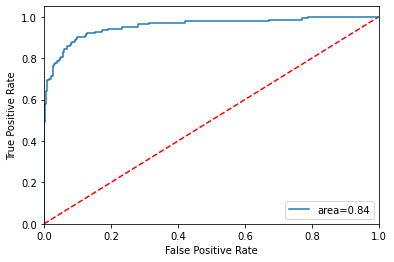

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
#print("Thresholds: {}".format(thresholds))
plt.figure()
plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr, label='area=%.2f'%(roc_auc_score))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Lets choose a threshold from the ROC curve to improve recall. 

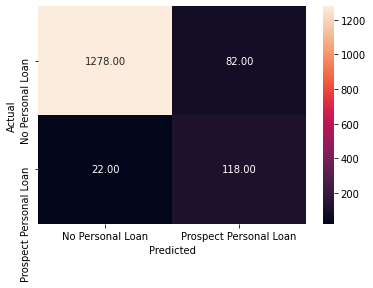

In [51]:
threshold = 0.20
probabilities = model.predict_proba(X_test)[:,1]
probabilities
predictions = list()
for x in probabilities:
    if (x > threshold):
        predictions.append(1)
    else:
        predictions.append(0)
cm = metrics.confusion_matrix(Y_test.values, predictions)
labels = ['No Personal Loan', 'Prospect Personal Loan']
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
print("Accuracy: {}".format(accuracy_score(Y_test, predictions)))
print("Precision: {}".format(precision_score(Y_test, predictions)))
print("Recall: {}".format(recall_score(Y_test, predictions)))
print("F1 score: {}".format(f1_score(Y_test, predictions)))
print("ROC AUC score: {}".format(roc_auc_score(Y_test, predictions)))

Accuracy: 0.9306666666666666
Precision: 0.59
Recall: 0.8428571428571429
F1 score: 0.6941176470588235
ROC AUC score: 0.8912815126050421


## With threshold < 0.5, the missed prospects are improved. Recall improved from 69% to 84%. 
## However the number of false targeting increased from 13 to 82, which will increase the ad budget. 
## It depends on the CLV (customer lifetime value) how much the bank can afford to increase ad budget to capture more prospects.

### Model improvement

### Check model parameters

In [53]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### In this problem, accuracy is not so important as recall and precision
### In our grid search, we will try to improve recall, followed by precision or the overall F1 score


In [54]:
test_recalls = list()
test_precision = list()
test_f1scores = list()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = 1.0
for s in solvers:
    model = LogisticRegression(random_state=28, C=C, solver=s, penalty='l2')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r, p, f = recall_score(Y_test, predictions), precision_score(Y_test, predictions), f1_score(Y_test, predictions)
    print("S2: {} R: {} P: {} F: {}".format(s, r, p, f))

# Try following solvers with l1 penalty
solvers = ['liblinear', 'saga']
for s in solvers:
    model = LogisticRegression(random_state=28, C=C, solver=s, penalty='l1')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r, p, f = recall_score(Y_test, predictions), precision_score(Y_test, predictions), f1_score(Y_test, predictions)
    print("S1: {} R: {} P: {} F: {}".format(s, r, p, f))


S2: newton-cg R: 0.6785714285714286 P: 0.8636363636363636 F: 0.76
S2: lbfgs R: 0.6928571428571428 P: 0.8818181818181818 F: 0.7759999999999999
S2: liblinear R: 0.6857142857142857 P: 0.8888888888888888 F: 0.7741935483870968
S2: sag R: 0.3142857142857143 P: 0.4489795918367347 F: 0.3697478991596638
S2: saga R: 0.30714285714285716 P: 0.4574468085106383 F: 0.36752136752136755
S1: liblinear R: 0.7 P: 0.8909090909090909 F: 0.7839999999999999
S1: saga R: 0.30714285714285716 P: 0.4574468085106383 F: 0.36752136752136755


## Lets select the best model with highest F1-score

precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.89      0.70      0.78       140

    accuracy                           0.96      1500
   macro avg       0.93      0.85      0.88      1500
weighted avg       0.96      0.96      0.96      1500



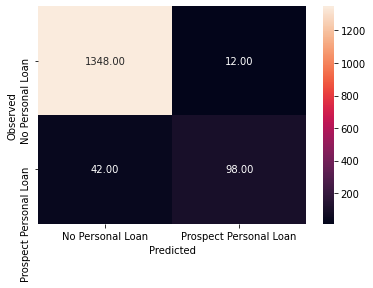

In [55]:
model = LogisticRegression(random_state=28, C=1.0, solver='liblinear', penalty='l1')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
result = metrics.classification_report(Y_test, predictions)
print(result)
#r, p, f = recall_score(Y_test, predictions), precision_score(Y_test, predictions), f1_score(Y_test, predictions)
#print("R: {} P: {} F: {}".format(r, p, f))
cm = confusion_matrix(Y_test, predictions)
labels = ['No Personal Loan', 'Prospect Personal Loan']
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.show()

### This is almost similar to our default model with 42 misses and 12 false positives. 

## Business Decision
### - Only 9% (140/1500) customers in the Test set were true prospects. 
### - Accuracy can be misleading in this case study due to the high number of non-prospects. 
### - Bank should focus on reducing the False negatives (missed prospects) to improve business results and revenue.
### - As we have seen with tweaking the probability threshold, getting more propects can also increase the False Positives (more targets)
### - The bank should go with the threshold=0.20 to capture more prospects (119/140) at the cost of increased ad budget. 
### - This is of course assuming the revenue per customer (High interest from Personal Loan) will justify the ad budget per customer.

### Lets find out which X features contributed to most of the classification

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]
X1 = X.values
Y1 = Y.values
model = ExtraTreesClassifier()
model.fit(X1, Y1)
df1 = pd.DataFrame({'Feature':X.columns.values, 'Importance':model.feature_importances_})
df1.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,Income,0.355650
4,CCAvg,0.152578
5,Education,0.138846
3,Family,0.091789
8,CD Account,0.074338
1,Experience,0.040586
0,Age,0.040382
6,Mortgage,0.036227
11,ZIP_Code_Area,0.027609
10,CreditCard,0.019026


### Income, CCAvg, Education were the dominant features